In [1]:
import os 
import librosa as lr
import numpy as np
import pandas as pd
import pickle

In [4]:
def features_audio(file_name):
    audio,sfreq = lr.load(file_name)
    S = np.abs(lr.stft(audio))
    pitches,magnitudes = lr.core.piptrack(y = audio ,sr = sfreq)
    #min_pitch = np.min(pitches)
    max_pitch = np.max(pitches)
    avg_pitch = np.mean(pitches)
    var_pitch = np.var(pitches)
    y_harmonic, y_percussive = lr.effects.hpss(audio)
    #print(np.mean(y_harmonic),np.mean(y_percussive))
    harmonic = np.mean(y_harmonic)
    harmonic_var = np.var(y_harmonic)
    percussive = np.mean(y_percussive)
    percussive_var = np.var(y_percussive)
    chroma=lr.feature.chroma_cens(y=y_harmonic, sr=sfreq)
    #print(np.mean(chroma))
    Chroma_cens = np.mean(chroma)
    Chroma_cens_var = np.var(chroma)
    
    chroma_stft =lr.feature.chroma_stft(y=y_harmonic, sr=sfreq)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)
    
    chroma_cqt =lr.feature.chroma_cqt(y=y_harmonic, sr=sfreq)
    chroma_cqt_mean = np.mean(chroma_cqt)
    chroma_cqt_var = np.var(chroma_cqt)
    
    mfccs = lr.feature.mfcc(y=y_harmonic, sr=sfreq)
    #print(np.mean(mfccs))
    Mfccs = np.mean(mfccs)
    Mfccs_var = np.var(mfccs)
    delta = lr.feature.delta(mfccs)
    mfcc_delta_mean = np.mean(delta)
    mfcc_delta_var = np.var(delta)
    contrast=lr.feature.spectral_contrast(y=y_harmonic,sr=sfreq)
    #print(np.mean(contrast))
    Contrast = np.mean(contrast)
    Contrast_var = np.var(contrast)
    
    rolloff = lr.feature.spectral_rolloff(y=audio, sr=sfreq)
    #print(np.mean(rolloff))
    Rolloff = np.mean(rolloff)
    Rolloff_var = np.var(rolloff)
    
    zrate=lr.feature.zero_crossing_rate(y_harmonic)
    #print(np.mean(zrate) )
    Zrate = np.mean(zrate)
    Zrate_var = np.var(zrate)
    
    cent = lr.feature.spectral_centroid(y=audio, sr=sfreq)
    Cent = np.mean(cent)
    Cent_var = np.var(cent)
    
    tonnetz = lr.feature.tonnetz(y=audio, sr=sfreq)
    tonnetz_mean = np.mean(tonnetz)
    tonnetz_var = np.var(tonnetz)
    
    poly_features = lr.feature.poly_features(S=S, sr=sfreq)
    poly_features_mean = np.mean(poly_features)
    poly_features_var = np.var(poly_features)
    
    spec_bw = lr.feature.spectral_bandwidth(y=audio, sr=sfreq)
    spec_bw_mean = np.mean(spec_bw)
    spec_bw_var = np.var(spec_bw)
    
    rmse = lr.feature.rms(y=audio)
    rmse_mean = np.mean(rmse)
    rmse_var = np.var(rmse)
    
    melspectrogram = lr.feature.melspectrogram(y=audio, sr=sfreq)
    melspec_mean = np.mean(melspectrogram)
    melspec_var = np.var(melspectrogram)
    
    data = list([max_pitch,avg_pitch,var_pitch,harmonic,harmonic_var,percussive,percussive_var,Chroma_cens,Chroma_cens_var,chroma_stft_mean,chroma_stft_var,chroma_cqt_mean,chroma_cqt_var,Mfccs,Mfccs_var,mfcc_delta_mean,mfcc_delta_var,Contrast,Contrast_var,Rolloff,Rolloff_var,Zrate,Zrate_var,Cent,Cent_var,tonnetz_mean,tonnetz_var,poly_features_mean,poly_features_var,spec_bw_mean,spec_bw_var,rmse_mean,rmse_var,melspec_mean,melspec_var])
    return data

In [5]:
x_pre = features_audio('./Recording (11).wav')

In [6]:
loaded_model = pickle.load(open('./Model.sav', 'rb'))

In [25]:
x_pre = np.array(x_pre)
x_pre = x_pre.reshape(1,-1)

In [26]:
loaded_model.predict(x_pre)

array([0.])

In [2]:
import matplotlib.pyplot as plt

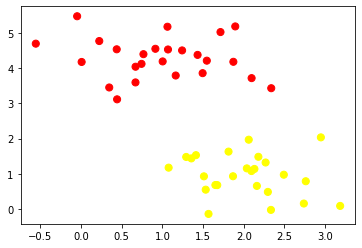

In [4]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')